In [1]:
!pip install nltk
import nltk; nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from wordcloud import WordCloud

You should consider upgrading via the '/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cbeams/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


You should consider upgrading via the '/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/bin/python -m pip install --upgrade pip' command.


In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [3]:
# Import Dataset
df = pd.read_json('../raw_data/all_data_df_stripped.json')
df.head()

,full_transcript,artist,show_name,year,source,artist_birthday,artist_gender,age_then,full_transcript_clean
0,[rock music playing]\n\n[indistinct chatter]\n...,Adam Devine,Best Time Of Our Lives,2019.0,Scraps from the Loft,1983.0,2,36.0,man guy much seat guy jacked fully juiced man ...
1,"strong language. CHEERING Yes, yes, yes! How...",Adam Hess,Live from the BBC,2016.0,BBC,1990.0,2,26.0,yes yes yes lovely apologise state voice go co...
2,"Ladies and gentlemen, please welcome your hos...",Adam Hills,Live at the Apollo Series 9 Episode 4,2013.0,BBC,1970.0,2,43.0,tonight london london live amazing act present...
3,some strong language and adult humour Ladies...,Adam Hills,Live at the Apollo Series 12 Episode 4,2016.0,BBC,1970.0,2,46.0,tonight hair lost bet british paralympic team ...
4,"? CHEERING Hello, Apollo. I am going to start ...",Adam Hills,Live at the Apollo Series 5 Episode 5,2009.0,BBC,1970.0,2,39.0,start saying something probably never heard co...


In [4]:
eighties_df = df[df['year'].between(1980, 1990)]

In [1]:
eighties_df

NameError: name 'eighties_df' is not defined

In [6]:
# Convert to list
data = eighties_df.full_transcript_clean.values.tolist()

pprint(data[:1])

['achieving fame saturday night live beverly hill cop released film version '
 'live standup performance mainly focus topic divorce relation sex problem '
 'encountered fame including offended listener fan continually greet '
 'unprintable catch phrase show little dance youall told stop running yes '
 'smack hear pant cost baby hear chocolate cake bought chocolate cake counter '
 'check cousin cecil pocket probably turkey leg sweet potato pie little '
 'brother show little dance lester talking move dance new nothing old '
 'shufflebutt show move lester sit drunk kid trying put show lester mama '
 'junior vanessa vanessa baby sing song grandma granddaughter niece fool fall '
 'love bird sing gay lover await break day fall love rain fall fool fall love '
 'fall love mama joke little eddie joke eddie eddie eddie joke lion monkey '
 'monkey weather change lion monkey started climbing tree started peeing lion '
 'head raining started farting thunder started doodooing snowing lion star '
 'k

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['achieving', 'fame', 'saturday', 'night', 'live', 'beverly', 'hill', 'cop', 'released', 'film', 'version', 'live', 'standup', 'performance', 'mainly', 'focus', 'topic', 'divorce', 'relation', 'sex', 'problem', 'encountered', 'fame', 'including', 'offended', 'listener', 'fan', 'continually', 'greet', 'unprintable', 'catch', 'phrase', 'show', 'little', 'dance', 'youall', 'told', 'stop', 'running', 'yes', 'smack', 'hear', 'pant', 'cost', 'baby', 'hear', 'chocolate', 'cake', 'bought', 'chocolate', 'cake', 'counter', 'check', 'cousin', 'cecil', 'pocket', 'probably', 'turkey', 'leg', 'sweet', 'potato', 'pie', 'little', 'brother', 'show', 'little', 'dance', 'lester', 'talking', 'move', 'dance', 'new', 'nothing', 'old', 'shufflebutt', 'show', 'move', 'lester', 'sit', 'drunk', 'kid', 'trying', 'put', 'show', 'lester', 'mama', 'junior', 'vanessa', 'vanessa', 'baby', 'sing', 'song', 'grandma', 'granddaughter', 'niece', 'fool', 'fall', 'love', 'bird', 'sing', 'gay', 'lover', 'await', 'break', 'd

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=5)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['achieving', 'fame', 'saturday', 'night', 'live', 'beverly', 'hill', 'cop', 'released', 'film', 'version', 'live', 'standup', 'performance', 'mainly', 'focus', 'topic', 'divorce', 'relation', 'sex', 'problem', 'encountered', 'fame', 'including', 'offended', 'listener', 'fan', 'continually', 'greet', 'unprintable', 'catch', 'phrase', 'show', 'little', 'dance', 'youall', 'told', 'stop', 'running', 'yes', 'smack', 'hear', 'pant', 'cost', 'baby', 'hear', 'chocolate', 'cake', 'bought', 'chocolate', 'cake', 'counter', 'check', 'cousin', 'cecil', 'pocket', 'probably', 'turkey', 'leg', 'sweet', 'potato', 'pie', 'little', 'brother', 'show', 'little', 'dance', 'lester', 'talking', 'move', 'dance', 'new', 'nothing', 'old', 'shufflebutt', 'show', 'move', 'lester', 'sit', 'drunk', 'kid', 'trying', 'put', 'show', 'lester', 'mama', 'junior', 'vanessa', 'vanessa', 'baby', 'sing', 'song', 'grandma', 'granddaughter', 'niece', 'fool', 'fall', 'love', 'bird', 'sing', 'gay', 'lover', 'await', 'break', 'da

In [9]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['achieve', 'fame', 'night', 'cop', 'release', 'film', 'version', 'live', 'standup', 'performance', 'mainly', 'focus', 'topic', 'divorce', 'relation', 'sex', 'problem', 'encounter', 'fame', 'include', 'offended', 'listener', 'fan', 'continually', 'greet', 'unprintable', 'catch', 'phrase', 'show', 'little', 'dance', 'youall', 'tell', 'stop', 'run', 'smack', 'hear', 'pant', 'cost', 'baby', 'hear', 'chocolate', 'cake', 'buy', 'counter', 'check', 'cousin', 'cecil', 'pocket', 'probably', 'pie', 'little', 'brother', 'show', 'little', 'dance', 'lester', 'talk', 'move', 'dance', 'new', 'old', 'shufflebutt', 'show', 'move', 'lester', 'sit', 'drunk', 'kid', 'try', 'put', 'show', 'vanessa', 'vanessa', 'baby', 'sing', 'grandma', 'granddaughter', 'niece', 'fool', 'fall', 'love', 'bird', 'sing', 'day', 'fall', 'love', 'rain', 'fall', 'fool', 'fall', 'love', 'fall', 'love', 'mama', 'joke', 'little', 'eddie', 'joke', 'weather', 'start', 'climb', 'tree', 'start', 'pee', 'lion', 'head', 'raining', 'sta

In [11]:
def remove_stopw(text, word_list):
    for i in range(len(text)):
        text[i] = [w for w in text[i] if not w in word_list]
    return text

In [19]:
### additional words to remove from the scripts
words_to_remove = ['thank', 'cheering', 'recorded', 'applause', 'laughter', 'laughing', 'murmuring', 'chatter',
                       'aired', 'filmed', 'ladies', 'gentlemen', 'welcome', 'stage', 'transcript', 'netflix',
                  'apollo', 'like', 'goodnight', 'mutter', 'noo', 'nuh', 'oof', 'maan', 'cause', 'okay', 
                   'hey', 'also', 'someone', 'somebody', 'everybody', 'also', 'part' , 'sometimes', 'maybe', 
                   'three', 'second', 'everything', 'minute', 'name', 'kind', 'point', 'yeah', 'hello', 'one', 
                   'two', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'whine', 'hnn', 'malla', 'letta', 
                   'namoo', 'getta', 'nama', 'mana', 'chk','manoo', 'hadda', 'ama', 'carlin',
                  'go', 'know', 'host', 'goodnight', 'get', 'gon', 'think', 'say', 'right', 'look',
                  'thing', 'make', 'know', 'want', 'going', 'would', 'could', 'gentlemen', 'let', 'please',
                   'hbo', 'special' 'yes', 'take', 'say', 'got', 'come', 'see', 'really', 'tell',
                   'well', 'give', 'said', 'people', 'mean', 'even', 'never', 'way', 'happen', 'put', 'much',
                  'lot', 'ever', 'still', 'live', 'quite', 'sort', 'actually', 'use', 'tonight', 'find', 'always',
                  'time', 'good', 'back', 'show', 'little', 'big', 'day', 'talk', 'start', 'need', 'bad', 'first', 'great',
                  'try', 'year', 'word', 'turn', 'bring', 'feel', 'bit', 'ck', 'cke', 'gger', 'ckin', 'groan', 'groan_low', 'groan_high',
                  'high_groan', 'low_groan', 'dingdingde']

decade_cleanup = ['fuck', 'fucking', 'shit', 'motherfucker', 'man', 'woman', 'guy']
                    
                    # 'know'? 'go'? 'fuck'?
    
                    # haven't left 'i'm' etc. as those should be cleaned up
                    # by a mixture of stopwords, punctuation removeal, lemmatizing and minimum length

remove_stopw(data_lemmatized, stopwords.words('english'))
remove_stopw(data_lemmatized, words_to_remove)
remove_stopw(data_lemmatized, decade_cleanup)

[['achieve',
  'fame',
  'night',
  'cop',
  'release',
  'film',
  'version',
  'standup',
  'performance',
  'mainly',
  'focus',
  'topic',
  'divorce',
  'relation',
  'sex',
  'problem',
  'encounter',
  'fame',
  'include',
  'offended',
  'listener',
  'fan',
  'continually',
  'greet',
  'unprintable',
  'catch',
  'phrase',
  'dance',
  'youall',
  'stop',
  'run',
  'smack',
  'hear',
  'pant',
  'cost',
  'baby',
  'hear',
  'chocolate',
  'cake',
  'buy',
  'counter',
  'check',
  'cousin',
  'cecil',
  'pocket',
  'probably',
  'pie',
  'brother',
  'dance',
  'lester',
  'move',
  'dance',
  'new',
  'old',
  'shufflebutt',
  'move',
  'lester',
  'sit',
  'drunk',
  'kid',
  'vanessa',
  'vanessa',
  'baby',
  'sing',
  'grandma',
  'granddaughter',
  'niece',
  'fool',
  'fall',
  'love',
  'bird',
  'sing',
  'fall',
  'love',
  'rain',
  'fall',
  'fool',
  'fall',
  'love',
  'fall',
  'love',
  'mama',
  'joke',
  'eddie',
  'joke',
  'weather',
  'climb',
  'tree',

In [20]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 11), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (8, 2), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 2), (16, 2), (17, 1), (18, 12), (19, 1), (20, 1), (21, 9), (22, 12), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 26), (32, 2), (33, 4), (34, 1), (35, 1), (36, 3), (37, 6), (38, 5), (39, 1), (40, 8), (41, 1), (42, 1), (43, 2), (44, 9), (45, 1), (46, 1), (47, 1), (48, 11), (49, 1), (50, 6), (51, 14), (52, 6), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 4), (59, 1), (60, 1), (61, 5), (62, 1), (63, 1), (64, 1), (65, 2), (66, 3), (67, 9), (68, 2), (69, 1), (70, 1), (71, 12), (72, 7), (73, 1), (74, 1), (75, 4), (76, 22), (77, 1), (78, 1), (79, 1), (80, 3), (81, 2), (82, 4), (83, 5), (84, 1), (85, 3), (86, 2), (87, 11), (88, 1), (89, 4), (90, 4), (91, 2), (92, 5), (93, 18), (94, 1), (95, 4), (96, 1), (97, 1), (98, 4), (99, 3), (100, 9), (101, 2), (102, 1), (103, 1), (104, 9), (105, 3), (106, 1), (107, 1), (108, 1), (109, 3)

In [21]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=31,
                                            random_state=100,
                                            update_every=10,
                                            chunksize=15,
                                            passes=10,
                                            alpha=0.4,
                                            eta=0.5,
                                            per_word_topics=True)

In [22]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(14,
  '0.000*"hear" + 0.000*"dog" + 0.000*"home" + 0.000*"life" + 0.000*"eat" + '
  '0.000*"walk" + 0.000*"love" + 0.000*"car" + 0.000*"ask" + 0.000*"wait"'),
 (25,
  '0.000*"hear" + 0.000*"love" + 0.000*"car" + 0.000*"sit" + 0.000*"goddamn" + '
  '0.000*"work" + 0.000*"keep" + 0.000*"walk" + 0.000*"life" + 0.000*"real"'),
 (15,
  '0.000*"car" + 0.000*"sport" + 0.000*"hear" + 0.000*"dog" + 0.000*"life" + '
  '0.000*"goddamn" + 0.000*"home" + 0.000*"keep" + 0.000*"ask" + 0.000*"love"'),
 (27,
  '0.000*"dog" + 0.000*"car" + 0.000*"home" + 0.000*"love" + 0.000*"hear" + '
  '0.000*"keep" + 0.000*"sit" + 0.000*"leave" + 0.000*"brother" + '
  '0.000*"call"'),
 (13,
  '0.014*"dog" + 0.007*"fart" + 0.007*"cat" + 0.006*"eat" + 0.005*"goddamn" + '
  '0.005*"cute" + 0.004*"leg" + 0.004*"boy_boy" + 0.004*"love" + 0.003*"home"'),
 (20,
  '0.009*"car" + 0.005*"war" + 0.005*"ask" + 0.004*"country" + 0.004*"drive" + '
  '0.004*"keep" + 0.003*"life" + 0.003*"goddamn" + 0.003*"buy" + 0.003*"help"'),
 

In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.588008222649233

Coherence Score:  0.2740812565468514


In [24]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.122352  0.075682       1        1  25.799618
29    -0.118003 -0.026800       2        1  20.798002
12     0.063379 -0.062791       3        1  11.713814
22     0.001460 -0.088418       4        1  11.130809
13    -0.059601 -0.058214       5        1  10.736095
20     0.050080  0.065648       6        1   9.992231
23    -0.026934  0.086524       7        1   9.323808
11     0.008731  0.000330       8        1   0.021080
6      0.008784  0.000333       9        1   0.021073
17     0.008822  0.000355      10        1   0.021069
5      0.008822  0.000352      11        1   0.021069
18     0.008823  0.000349      12        1   0.021069
16     0.008830  0.000341      13        1   0.021068
1      0.008828  0.000349      14        1   0.021068
8      0.008836  0.000351      15        1   0.021068
24     0.008830  0.000351      16        1   0.021068
19     0.008832  0.000353      17        1   0.021067
30     0.008836  0.000350      18        1   0.021067
14     0.008837  0.000349      19        1   0.021067
28     0.008837  0.000349      20        1   0.021067
10     0.008840  0.000351      21        1   0.021067
9      0.008840  0.000353      22        1   0.021067
21     0.008839  0.000356      23        1   0.021067
15     0.008848  0.000347      24        1   0.021066
4      0.008842  0.000349      25        1   0.021066
26     0.008845  0.000356      26        1   0.021066
2      0.008849  0.000345      27        1   0.021066
27     0.008854  0.000349      28        1   0.021066
25     0.008851  0.000354      29        1   0.021066
3      0.008851  0.000348      30        1   0.021065
7      0.008864  0.000348      31        1   0.021064, topic_info=         Term       Freq      Total Category  logprob  loglift
1000      dog  64.000000  64.000000  Default  30.0000  30.0000
98        car  62.000000  62.000000  Default  29.0000  29.0000
2627    sport  33.000000  33.000000  Default  28.0000  28.0000
76    brother  38.000000  38.000000  Default  27.0000  27.0000
856      walk  61.000000  61.000000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
856      walk   0.001016  61.876283  Topic31  -8.1952  -2.5514
593     pussy   0.001016  36.832668  Topic31  -8.1953  -2.0327
479      mind   0.001016  30.843587  Topic31  -8.1953  -1.8552
527       old   0.001016  33.360115  Topic31  -8.1956  -1.9340
444      lose   0.001015  25.356822  Topic31  -8.1966  -1.6607

[2604 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1817      3  0.401700    absolute
902       7  0.411155  acceptance
904       7  0.411175      action
2680      4  0.403871      addict
2681      4  0.571745  additional
...     ...       ...         ...
895       7  0.094613       write
1266      7  0.411162     writing
3007      4  0.403845        yell
3310      5  0.405353       yodel
1814      6  0.407839      yuppie

[1671 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 30, 13, 23, 14, 21, 24, 12, 7, 18, 6, 19, 17, 2, 9, 25, 20, 31, 15, 29, 11, 10, 22, 16, 5, 27, 3, 28, 26, 4, 8])

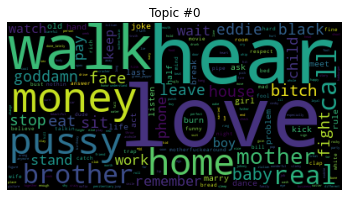

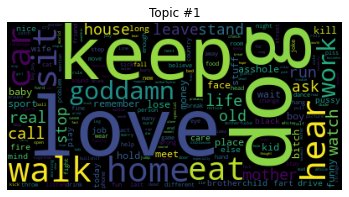

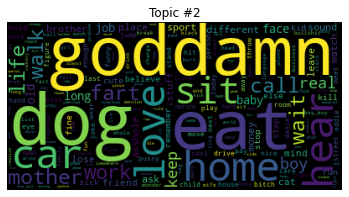

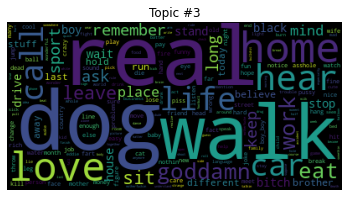

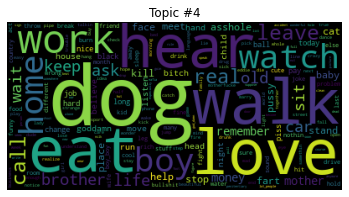

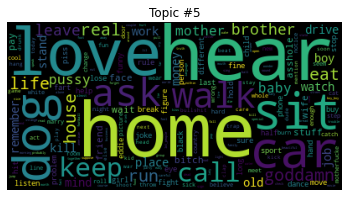

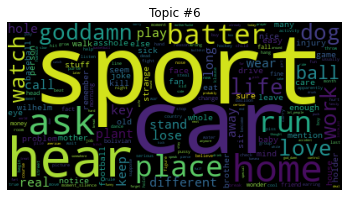

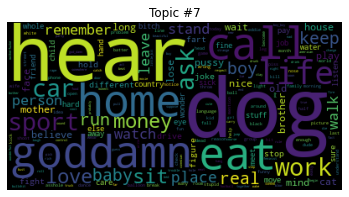

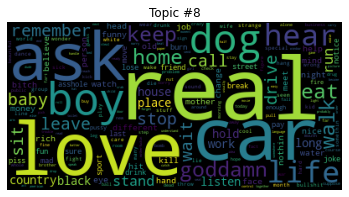

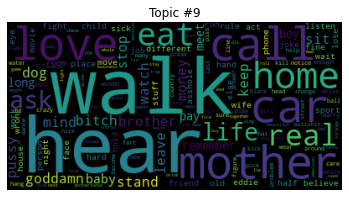

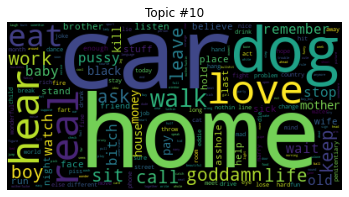

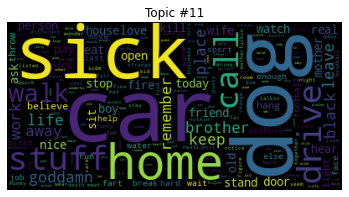

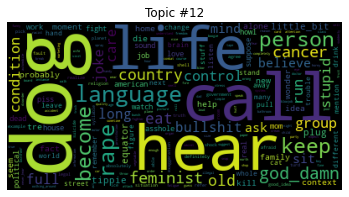

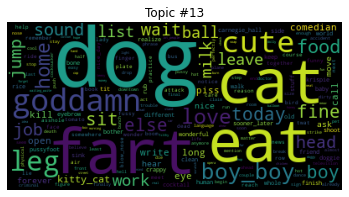

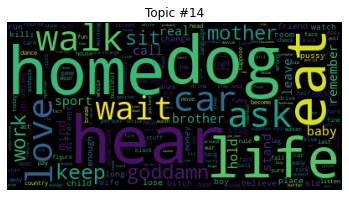

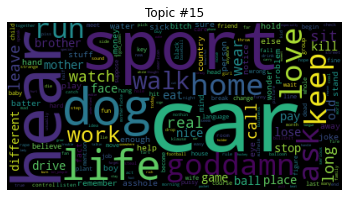

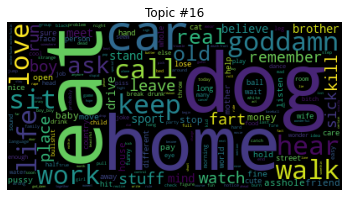

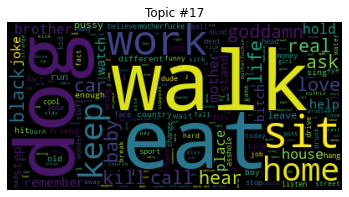

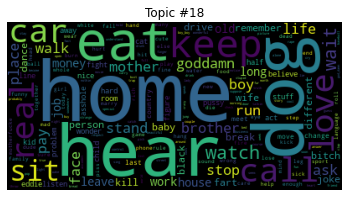

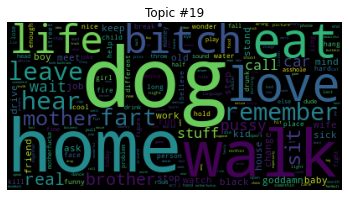

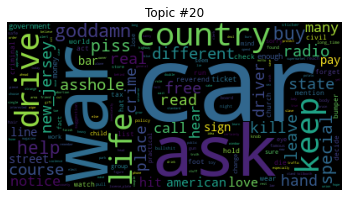

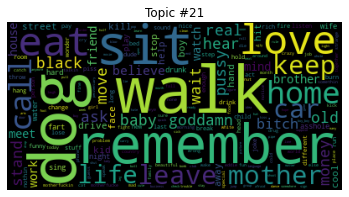

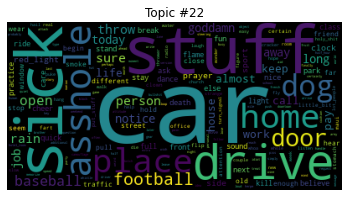

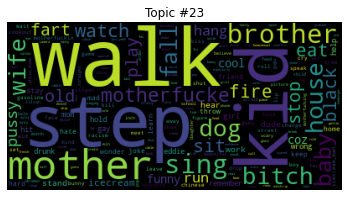

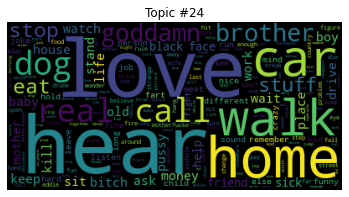

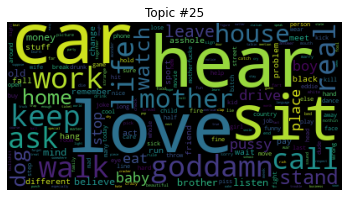

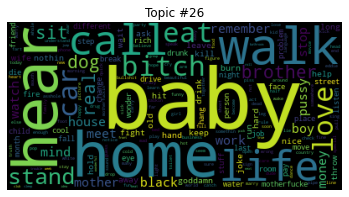

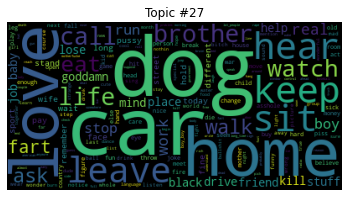

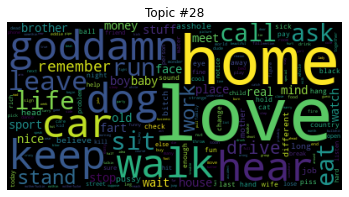

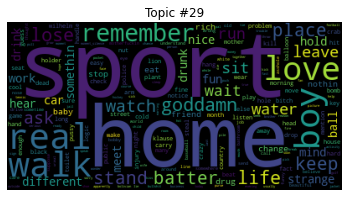

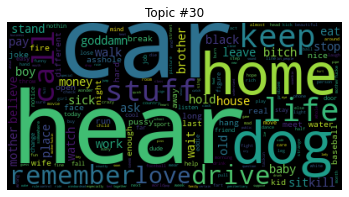

/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/cbeams/.pyenv/versions/3.8.12/envs/objectively_funny/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's docu

In [25]:
# lda is assumed to be the variable holding the LdaModel object
import matplotlib.pyplot as plt
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()